In [7]:
import tarfile

main_tar = "../../data/img_data_85017-2.tar"
data_dir = "../../data/img_data"


with tarfile.open(main_tar, 'r') as f:
    f.extractall(data_dir)


Read tar file


In [1]:
import os
import tarfile
import math
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO

In [155]:
# Extracting main tar ball 

main_tar = "../../data/img_data_85017-3.tar"
data_dir = "../../data/img_data/Psychrophiles"

with tarfile.open(main_tar, 'r') as f:
    f.extractall(data_dir)

In [127]:
def get_meta(df_meta, genome):
    genome_id = int(genome.split('.')[0])

    # get meta

    row = df_meta.loc[df_meta["IMG Genome ID "] == genome_id]
    sample_temp = row["Sample Collection Temperature"]

    try:
        nan = math.isnan(sample_temp.values[0])
        if nan:
            val = '-'
    except TypeError:
        val = sample_temp.values[0].split(" ")[0]
        unit = sample_temp.values[0].split(" ")[-1]
        if unit != "C":
            raise TypeError("Conversion from {} not implemented needs to be C".format(unit))
    except:
        raise ValueError("Value of type {} for Sample Collection Temp is not permitted".format(type(sample_temp.values[0]))) 
    sample_temp = val
    range_temp  = row["Temperature Range"].values[0]
    return genome_id, range_temp, sample_temp 
        
def get_seqs(f, genome_id, range_temp, sample_temp):
    # get seqs
    prot_fasta_file = [info.name for info in f.getmembers() if info.name[-3:] == "faa"]
    prot_fasta_file_obj = f.extractfile(prot_fasta_file[0])

    prot_fasta_file = StringIO("".join([line.decode('utf-8') for line in prot_fasta_file_obj.readlines()]))

    #collect data

    fasta_dict = {"Id": [], "records": [], "seq": []}
    for rec in SeqIO.parse(prot_fasta_file,"fasta"):
        fasta_dict["Id"].append(rec.id)
        fasta_dict["records"].append(rec.description + "| {} | {} | {}".format(genome_id, range_temp , sample_temp))
        fasta_dict["seq"].append(str(rec.seq))
    return fasta_dict

In [156]:
fasta_template_string = ">{} {}\n{}\n"

meta_data_file = "../../data/taxontable122184_22-jul-2021.xls"
df_meta = pd.read_csv(meta_data_file, sep='\t')

d_set_file = "../../data/img_psychrophiles_data.fasta"

l = os.listdir(data_dir)
count = 0
for genome in os.listdir(data_dir):
    if genome != ".ipynb_checkpoints":
        # Get meta data
        genome_id, range_temp, sample_temp = get_meta(df_meta, genome)
        # Get Sequence data
        with tarfile.open(os.path.join(data_dir,genome), 'r') as f:
            fasta_dict = get_seqs(f, genome_id, range_temp, sample_temp)
        # Write fasta 
        n_seqs = len(fasta_dict["Id"])
        temperature = fasta_dict["records"][0].split(" | ")[-1]
        with open(d_set_file, "a") as d:
            for seq_id, seq_rec, seq in zip(fasta_dict["Id"], fasta_dict["records"], fasta_dict["seq"]):
                d.write(fasta_template_string.format(seq_id,seq_rec,seq))
        print("Done intergrating {} sequences with {} sample temp from file {} ".format(n_seqs, temperature, genome))
    else:
        print("skipping file {}".format(genome))


Done intergrating 517 sequences with 10 sample temp from file 2642422608.tar.gz 
Done intergrating 4535 sequences with - sample temp from file 2597490200.tar.gz 
Done intergrating 469 sequences with 3.8 sample temp from file 2700988676.tar.gz 
Done intergrating 287 sequences with 10 sample temp from file 2747842531.tar.gz 
Done intergrating 540 sequences with 3.2 sample temp from file 2734482302.tar.gz 
Done intergrating 3954 sequences with 15 sample temp from file 2667527456.tar.gz 
Done intergrating 1364 sequences with 3.2 sample temp from file 2747842529.tar.gz 
Done intergrating 718 sequences with 10 sample temp from file 2734482300.tar.gz 
Done intergrating 2173 sequences with - sample temp from file 2859164979.tar.gz 
Done intergrating 3946 sequences with - sample temp from file 2585428047.tar.gz 
Done intergrating 695 sequences with 10 sample temp from file 2734482330.tar.gz 
Done intergrating 942 sequences with 1.82 sample temp from file 2713897499.tar.gz 
Done intergrating 296

In [2]:
files = [ "../../data/img_psychrophiles_data.fasta"]
fasta_dict = {"Id": [], "tmp": [], "seq": []}
for i, file in enumerate(files):
    for rec in SeqIO.parse(file, 'fasta'):
        seq_len = len(str(rec.seq))
        if i > 0:
            seq_tmp = rec.description.split(" | ")[-1]
        else:
            seq_tmp = rec.description.split()[-1]
            
        if  seq_len >= 100 and seq_len <= 512 and seq_tmp != "-":
            fasta_dict["Id"].append(rec.id)
            fasta_dict["tmp"].append(seq_tmp)
            fasta_dict["seq"].append(rec.seq)

In [4]:
tmp = [ float(i.split(" | ")[-1]) for i in fasta_dict["tmp"] if i.split(" | ")[-1] != "-"]
seq_lengths = [len(i) for i in fasta_dict["seq"] if len(i) <= 512]
tot_n_seqs = len(fasta_dict["Id"])
temp_n_seq = len(tmp)
nontemp_n_seqs = tot_n_seqs-temp_n_seq

print("Total number of sequences: {}".format(tot_n_seqs))
print("Number of sequences with sample temperature: {}".format(temp_n_seq))
print("Number of sequences without sample temperatures: {}".format(nontemp_n_seqs))


Total number of sequences: 136993
Number of sequences with sample temperature: 136993
Number of sequences without sample temperatures: 0


In [6]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

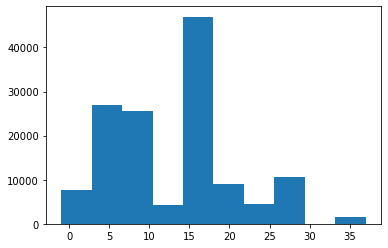

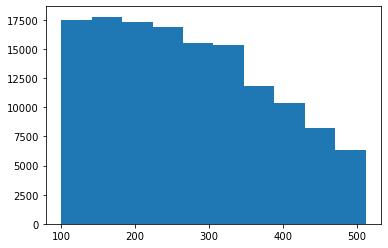

In [5]:
plt.figure()
plt.hist(tmp)
plt.title("Sample Temperature")
plt.
plt.figure()
plt.hist(seq_lengths)
plt.show()

In [38]:
with tarfile.open(os.path.join(data_dir,l[0]), 'r') as f:
    members = [info.name for info in f.getmembers()]
    [print(mem) for mem in members]
    s = f.extractfile(members[2])   
    string = StringIO("".join([item.decode('utf-8') for item in s.readlines()]))
    fasta_dict = {"Id": [], "records": [], "seq": []}
    for rec in SeqIO.parse(string,"fasta"):
        #print(dir(rec))
        fasta_dict["Id"].append(rec.id)
        fasta_dict["records"].append(rec.description)
        fasta_dict["seq"].append(rec.seq)


2627853791/2627853791.cog.tab.txt
2627853791/2627853791.fna
2627853791/2627853791.genes.faa
2627853791/2627853791.genes.fna
2627853791/2627853791.gff
2627853791/2627853791.intergenic.fna
2627853791/2627853791.ipr.tab.txt
2627853791/2627853791.ko.tab.txt
2627853791/2627853791.pfam.tab.txt
2627853791/2627853791.signalp.tab.txt
2627853791/2627853791.tigrfam.tab.txt
2627853791/2627853791.tmhmm.tab.txt
2627853791/README.txt


In [44]:
df = pd.DataFrame(fasta_dict)
df["records"][3]

'2628987427 Ga0077854_114 Tetratricopeptide repeat-containing protein [Thermotoga sp. RQ7]'

In [89]:
meta_data = "../../data/taxontable119966_21-jul-2021.xls"

df_meta = pd.read_csv(meta_data, sep='\t')

math.isnan(df_meta.loc[df_meta["Sample Collection Temperature"] == ""]["Sample Collection Temperature"].values[0])

TypeError: must be real number, not str

In [204]:
fasta_template_string = ">{} {}\n{}\n"
with open("../../data/all_OGT_IMG.fasta", "w") as file_writer:
    for seq_id, temp, seq in zip(fasta_dict["Id"], fasta_dict["tmp"], fasta_dict["seq"]):
        file_writer.write(fasta_template_string.format(seq_id, temp, seq))

In [205]:
! cd-hit -i "../../data/all_OGT_IMG.fasta" -c 0.95 -o "../../data/all_OGT_IMG_cd.fasta" -M 0 -T 10

Program: CD-HIT, V4.8.1 (+OpenMP), Mar 22 2020, 15:35:52
Command: cd-hit -i ../../data/all_OGT_IMG.fasta -c 0.95 -o
         ../../data/all_OGT_IMG_cd.fasta -M 0 -T 10

Started: Fri Jul 23 15:56:18 2021
                            Output                              
----------------------------------------------------------------
total seq: 3220521
longest and shortest : 512 and 100
Total letters: 981418109
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 1380M
Buffer          : 10 X 49M = 492M
Table           : 2 X 116M = 233M
Miscellaneous   : 39M
Total           : 2146M

Table limit with the given memory limit:
Max number of representatives: 832455
Max number of word counting entries: 46358616

# comparing sequences from          0  to      11336
..........    10000  finished       9547  clusters
.---------- new table with    10883 representatives
# comparing sequences from      11336  to     107994
..........    20000  finished      19099  clu

In [212]:
fasta_dict = {"Id": [], "records": [], "seq": []}
for rec in SeqIO.parse("../../data/img_thermophile_data.fasta","fasta"):
        fasta_dict["Id"].append(rec.id)
        fasta_dict["records"].append(rec.description)
        fasta_dict["seq"].append(rec.seq)

In [6]:
import os
path = "../../data/file1.txt"
print(os.path.basename(path).split('.')[0])
print(os.path.dirname(path))

file1
../../data


In [9]:
import tarfile
with tarfile.open("../../data/img_data_85017-3.tar") as f:
    f.extractall("../../data/test")

In [65]:
aas = 'XACDEFGHIKLMNPQRSTVWY'
table = {aa: i-1 for i, aa in enumerate(aas)}
table['U'] = -1
def to_int(seq):
    
    tmp = -np.ones((512,), dtype = np.int64)
    seq = [ table[aa] for aa in str(rec.seq).upper()]
    tmp[:len(seq)] = seq
    return tmp

In [66]:
import tensorflow as tf
import numpy as np
from Bio import SeqIO

file_all = "../../data/Combined_data/OGT_IMG_all_cd.fasta"
file_pub = "../../data/Combined_data/OGT_IMG_published_cd.fasta"

## Load Data

data = {"id": [], "seq": [], "temp": []}

for rec in SeqIO.parse(file_all, "fasta"):
    if float(rec.description.split()[-1]) > 90:
        data["id"].append(rec.id)
        data["seq"].append(to_int( str(rec.seq).upper()))
        data["temp"].append(float(rec.description.split()[-1]))

    

In [67]:
def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=value))

In [68]:
file = "test.tfrecord"

with tf.io.TFRecordWriter(file) as tfrecord:
    for i in range(len(data["id"])):
        features = {
          'temp': _float_feature(data["temp"][i]),
          'seq': _int64_feature(data["seq"][i])
          }
        element = tf.train.Example(features = tf.train.Features(feature=features))
        tfrecord.write(element.SerializeToString())

In [69]:
print([ table[aa] for aa in str(rec.seq).upper()])

[10, 10, 8, 7, 0, 7, 5, 0, 9, 9, 17, 7, 17, 7, 2, 13, 17, 16, 8, 11, 4, 17, 13, 15, 14, 11, 15, 15, 17, 6, 7, 11, 19, 5, 7, 7, 4, 5, 9, 4, 8, 14, 11, 13, 19, 0, 0, 18, 9, 19, 16, 7, 0, 18, 9, 7, 9, 17, 4, 19, 9, 14, 9, 15, 4, 15, 9, 15, 2, 9, 15, 9, 5, 9, 7, 7, 5, 5, 9, 7, 15, 11, 8, 7, 2, 14, 4, 14, 17, 5, 5, 0, 7, 2, 18, 7, 2, 9, 18, 5, 12, 7, 14, 14, 9, 11, 7, 0, 2, 7, 5, 7, 0, 9, 5, 4, 9, 7, 18, 7, 7, 2, 8, 7, 11, 9]


In [70]:
tfdata = tf.data.TFRecordDataset(file)

In [71]:
for d in tfdata:
    print(d)
    break

tf.Tensor(b'\n\xfe\x1a\n\x10\n\x04temp\x12\x08\x12\x06\n\x04\x00\x00\xbeB\n\xe9\x1a\n\x03seq\x12\xe1\x1a\x1a\xde\x1a\n\xdb\x1a\n\x13\x08\x03\x0c\t\x05\x11\x08\x11\x02\x04\x03\x0f\x05\x11\x07\x03\x05\x00\x08\x08\t\x11\x0e\x0e\t\x0f\x02\n\x08\x05\x13\x04\t\x02\x03\x03\x10\x12\x0e\x03\t\x11\x03\x0e\x03\x02\x0c\x11\x11\x13\x03\x11\x13\x00\x11\x03\r\x03\x03\x08\x03\x05\x02\t\x0b\x04\x00\x10\x10\x11\t\x13\x0c\x05\x08\x11\x05\x08\x03\x04\x04\x04\x10\x08\x05\x06\x04\x06\x00\x08\x0e\x02\x0e\x00\x03\x11\x13\x07\x00\t\x08\x05\x08\x05\x05\n\t\t\r\x10\x0c\x03\x05\x03\x00\x0e\x12\x07\x0c\n\x03\x0c\x05\x10\x11\x11\x13\x11\x0c\x0c\x13\x12\x00\x06\x0e\x10\x11\x0b\x10\x05\x02\x03\x0c\x04\x07\x04\t\x00\x07\x13\x0c\x00\x02\x00\x05\x06\x02\x13\x05\x10\x07\x00\x03\x08\x05\x04\x0f\x08\x07\x11\x07\x03\x03\x0b\x05\x03\x11\x08\x11\x11\x02\x0b\x0c\x0e\x12\x08\x0b\xff\xff\xff\xff\xff\xff\xff\xff\xff\x01\xff\xff\xff\xff\xff\xff\xff\xff\xff\x01\xff\xff\xff\xff\xff\xff\xff\xff\xff\x01\xff\xff\xff\xff\xff\xff\xff\xff

In [97]:
# Create a description of the features.
feature_description = {
    'temp': tf.io.FixedLenFeature([], tf.float32, default_value=0.0),
    'seq': tf.io.FixedLenFeature([512], tf.int64, default_value=np.zeros((512,)))
}

def _parse_function(item):
  # Parse the input `tf.train.Example` proto using the dictionary above.
    item = tf.io.parse_single_example(item, feature_description)
    item = (tf.one_hot(item['seq'],21, off_value=0.0), item["temp"])
    return item

parsed_tfdata = tfdata.map(_parse_function)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [98]:
for d in parsed_tfdata.take(1):
    print(d[1])

tf.Tensor(0.0, shape=(), dtype=float32)


In [36]:
elements =  ([{"a": 1, "b": "foo"},
              {"a": 2, "b": "bar"},
              {"a": 3, "b": "baz"}])
dataset = tf.data.Dataset.from_generator(
    lambda: elements, {"a": tf.int32, "b": tf.string})
# `map_func` takes a single argument of type `dict` with the same keys
# as the elements.
result = dataset.map(lambda d: str(d["a"]) + d["b"])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [37]:
for i in result.take(1):
    print(i)

tf.Tensor(b'Tensor("args_0:0", dtype=int32)foo', shape=(), dtype=string)


In [40]:
w = lambda x: x**2

print(w(4))

16


In [82]:
import os
# Train test split

FASTA_STRING = ">{} {}\n{}\n"

path_COG = "../../data/Combined_data/OGS"

raw_fasta  = "../../data/Combined_data/OGT_IMG_all_cd.fasta"

test_fasta =  ["COG0039.fasta" , "COG2032.fasta"]

train_set = "../../data/Combined_data/train.fasta"
test_set = "../../data/Combined_data/test.fasta"

ids_test = []


# Write test set
with open(test_set, "w") as file_writer:
    for cog in test_fasta:
        for rec in SeqIO.parse(os.path.join(path_COG, cog), "fasta"):
            file_writer.write(FASTA_STRING.format(rec.id, rec.description.split()[-1], rec.seq))
            ids_test.append(rec.id)
            
# Write train set
with open(train_set, "w") as file_writer:
    for rec in SeqIO.parse(raw_fasta,"fasta"):
        if rec.id not in ids_test:
            file_writer.write(FASTA_STRING.format(rec.id, rec.description.split()[-1], rec.seq))

In [85]:
for i ,rec in enumerate(SeqIO.parse(train_set, "fasta")):
    pass
print("Train set has {} sequences".format(i))
for i ,rec in enumerate(SeqIO.parse(test_set, "fasta")):
    pass
print("Test set has {} sequences".format(i))
for i ,rec in enumerate(SeqIO.parse(raw_fasta, "fasta")):
    pass
print("raw set has {} sequences".format(i))

Train set has 2992741 sequences
Test set has 6471 sequences
raw set has 2999212 sequences


In [86]:
import pandas as pd

df_all = pd.read_csv("../../data/Combined_data/Annotation/OGT_IMG_all_cd.emapper.annotations", sep = "\t" , skiprows=4, skipfooter=3)

id_ = []
for rec in SeqIO.parse("../../data/Combined_data/OGT_IMG_published_cd.fasta", "fasta"):
    id_.append(rec.id)

df_published = df_all[df_all["#query"].isin(id_)]

/home/sandra/anaconda3/envs/Cyclic_gan/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [90]:
df_published.to_csv("../../data/Combined_data/Annotation/OGT_IMG_published_cd.emapper.annotations", sep = "\t")

In [91]:
df_published = readhead(5)

,#query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
0,D1Y4G6,352165.HMPREF7215_0109,1.025000e-254,786.0,"COG0282@1|root,COG0282@2|Bacteria,3T9SZ@508458...",508458|Synergistetes,H,Catalyzes the formation of acetyl phosphate fr...,ackA,-,...,ko:K00925,"ko00430,ko00620,ko00640,ko00680,ko00720,ko0110...","M00357,M00579","R00315,R01353","RC00002,RC00043","ko00000,ko00001,ko00002,ko01000",-,-,-,Acetate_kinase
1,A0A095FLB5,999541.bgla_1g35890,2.076000e-188,589.0,"COG0340@1|root,COG0340@2|Bacteria,1MWCC@1224|P...",28216|Betaproteobacteria,H,biotin lipoate A B protein ligase,birA,-,...,ko:K03524,"ko00780,ko01100,map00780,map01100",-,"R01074,R05145","RC00043,RC00070,RC00096,RC02896","ko00000,ko00001,ko01000,ko03000",-,-,-,"BPL_C,BPL_LplA_LipB"
2,B2SM84,360094.PXO_06081,1.893000e-150,475.0,"COG4229@1|root,COG4229@2|Bacteria,1R3V9@1224|P...",135614|Xanthomonadales,E,Bifunctional enzyme that catalyzes the enoliza...,mtnC,"GO:0000096,GO:0000097,GO:0003674,GO:0003824,GO...",...,ko:K09880,"ko00270,ko01100,map00270,map01100",M00034,R07395,RC02779,"ko00000,ko00001,ko00002,ko01000",-,-,-,Hydrolase
3,V7UQW2,90371.CY43_20890,7.497000e-127,405.0,"COG0746@1|root,COG0746@2|Bacteria,1RH3M@1224|P...",1236|Gammaproteobacteria,H,Transfers a GMP moiety from GTP to Mo-molybdop...,mobA,"GO:0000287,GO:0003674,GO:0003824,GO:0005488,GO...",...,ko:K03752,"ko00790,ko01100,map00790,map01100",-,R11581,-,"ko00000,ko00001,ko01000",-,-,"iAPECO1_1312.APECO1_2604,iEcHS_1320.EcHS_A4080...","MobB,NTP_transf_3"
4,A0A0P1H8X8,439496.RBY4I_1772,0.000000e+00,1040.0,"COG3119@1|root,COG3119@2|Bacteria,1MV0B@1224|P...",28211|Alphaproteobacteria,P,COG3119 Arylsulfatase A and related enzymes,betC,-,...,ko:K01133,-,-,-,-,"ko00000,ko01000",-,-,-,"Choline_sulf_C,DUF4976,Sulfatase"
